# WeRateDogs Twitter Archive Data Analysis Project
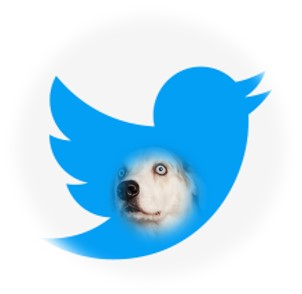

# Introduction

As per this assignment I will use data wrangling techniques , as my twitter developer credentials are not approved, 
based on mentor's advice, I am using the pre processed json text file.

In [1]:
pwd

'C:\\Users\\Deepak'

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
import requests
import json
from PIL import Image
from io import BytesIO

### Gathering Data

In [48]:
#Tload dataset
df=pd.read_csv(r'C:\Users\Deepak\Desktop\WeRateDogs\twitter-archive-enhanced.csv')

In [49]:
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [51]:
#Image file .tsc , downloaded programmatically using the Requests library 
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
#response.content
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [52]:
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')

In [53]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [54]:
#This is a dummy code 
'''consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in df['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)
#Isolating the json part of each tweepy status object that we have downloaded and adding them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
#we write this list into a txt file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
'''

"consumer_key = ''\nconsumer_secret = ''\naccess_token = ''\naccess_secret = ''\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)\n# Fetch tweets from the twitter API using the following loop:\nlist_of_tweets = []\n# Tweets that can't be found are saved in the list below:\ncant_find_tweets_for_those_ids = []\nfor tweet_id in df['tweet_id']:   \n    try:\n        list_of_tweets.append(api.get_status(tweet_id))\n    except Exception as e:\n        cant_find_tweets_for_those_ids.append(tweet_id)\n#Isolating the json part of each tweepy status object that we have downloaded and adding them all into a list\nmy_list_of_dicts = []\nfor each_json_tweet in list_of_tweets:\n    my_list_of_dicts.append(each_json_tweet._json)\n#we write this list into a txt file\nwith open('tweet_json.txt', 'w') as file:\n        file.write(json.dumps(my_list_of_dicts, ind

In [55]:
ls tweet_json.txt

 Volume in drive C is OS
 Volume Serial Number is 8CD0-EBF6

 Directory of C:\Users\Deepak

06/01/2021  09:53 PM                 2 tweet_json.txt
               1 File(s)              2 bytes
               0 Dir(s)  1,415,962,251,264 bytes free


In [56]:
tweet_json_data = []
with open(r'C:\Users\Deepak\Desktop\WeRateDogs\tweet_json.txt') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
tweet_json = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

tweet_json.head(10)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048
5  891087950875897856           3261           20562
6  890971913173991426           2158           12041
7  890729181411237888          16716           56848
8  890609185150312448           4429           28226
9  890240255349198849           7711           32467

In [57]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Assessing Data

For quality and tidiness issue check , I will assess the data visually and programatically, point of check will be only tweets with original ratings with images, 
no retweets, be retained

###### visual / programmatic assessment for each of the 3 files

In [58]:
df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

Checking for duplicated columns

In [59]:
print("Duplicated:  {}".format(sum(df.duplicated())))
#checking top 30 names and their counts
df.name.value_counts().head(30)

Duplicated:  0


None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
Buddy        7
Daisy        7
Toby         7
Bailey       7
an           7
Leo          6
Dave         6
Jax          6
Oscar        6
Scout        6
Bella        6
Milo         6
Rusty        6
Jack         6
Stanley      6
Koda         6
Finn         5
Name: name, dtype: int64

In [60]:
#checking how many tweets does not have no expanded url
sum(df.expanded_urls.isna())

59

59 tweets doesnot have expanded urls

In [61]:
#checking descriptions
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [62]:
df.describe().T

count          mean           std           min  \
tweet_id                  2356.0  7.427716e+17  6.856705e+16  6.660209e+17   
in_reply_to_status_id       78.0  7.455079e+17  7.582492e+16  6.658147e+17   
in_reply_to_user_id         78.0  2.014171e+16  1.252797e+17  1.185634e+07   
retweeted_status_id        181.0  7.720400e+17  6.236928e+16  6.661041e+17   
retweeted_status_user_id   181.0  1.241698e+16  9.599254e+16  7.832140e+05   
rating_numerator          2356.0  1.312649e+01  4.587665e+01  0.000000e+00   
rating_denominator        2356.0  1.045543e+01  6.745237e+00  0.000000e+00   

                                   25%           50%           75%  \
tweet_id                  6.783989e+17  7.196279e+17  7.993373e+17   
in_reply_to_status_id     6.757419e+17  7.038708e+17  8.257804e+17   
in_reply_to_user_id       3.086374e+08  4.196984e+09  4.196984e+09   
retweeted_status_id       7.186315e+17  7.804657e+17  8.203146e+17   
retweeted_status_user_id  4.196984e+09  4.196984e+09  4.196984e+09   
rating_numerator          1.000000e+01  1.100000e+01  1.200000e+01   
rating_denominator        1.000000e+01  1.000000e+01  1.000000e+01   

                                   max  
tweet_id                  8.924206e+17  
in_reply_to_status_id     8.862664e+17  
in_reply_to_user_id       8.405479e+17  
retweeted_status_id       8.874740e+17  
retweeted_status_user_id  7.874618e+17  
rating_numerator          1.776000e+03  
rating_denominator        1.700000e+02

In [63]:
# total missing values for each features
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

There are many columns with null vales

In [64]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Majority of twiterrati rated 10

In [65]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Majority of twiterrati logged the tweet from iphone

In [66]:
image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

Checking the head and tail of image prediction file, for convenience sake , both run in same cell

In [67]:
image_predictions.head(10), image_predictions.tail(10)


(             tweet_id                                          jpg_url  \
 0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
 1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
 2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
 3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
 4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
 5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
 6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
 7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
 8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
 9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
 
    img_num                      p1   p1_conf  p1_dog                  p2  \
 0        1  Welsh_springer_spaniel  0.465074    True              collie   
 1        1        

In [68]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [69]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [70]:
#checking duplicated urls
sum(image_predictions.jpg_url.duplicated())

66

In [71]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [72]:
tweet_json

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

In [73]:
#random sample check from this json derived dataframe
tweet_json.sample(10)

tweet_id  retweet_count  favorite_count
621   796080075804475393           2703            9469
466   817120970343411712           3011           13367
1715  680191257256136705            577            2356
1018  746757706116112384           4432           10520
489   813812741911748608          16267           40402
1670  682389078323662849            518            1828
860   762699858130116608           4190           13518
1374  701805642395348998           1900            3752
2184  668981893510119424            340             573
598   798682547630837760           5515               0

In [74]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [75]:
sum(tweet_json.duplicated())

0

In [76]:
tweet_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [77]:
tweet_json.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [78]:
tweet_json.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [79]:
# top 5 retweet_count records
tweet_json.sort_values(['retweet_count'], ascending= 0)[0:5]

tweet_id  retweet_count  favorite_count
1037  744234799360020481          79515          131075
259   842892208864923648          56625               0
533   807106840509214720          56625          107015
816   770743923962707968          52360               0
1077  739238157791694849          52360           75163

In [80]:
# top 5 favorite_count records
tweet_json.sort_values(['favorite_count'], ascending= 0)[0:5]

tweet_id  retweet_count  favorite_count
412   822872901745569793          48265          132810
1037  744234799360020481          79515          131075
65    879415818425184262          45849          107956
533   807106840509214720          56625          107015
134   866450705531457537          32883          106827

#### 3 datasets were subjected to visual and progrm checks and corresponding (only relevant )findings were commented in the following markdown cell

#### Assessment summary

###### df (base file) , image file , json file

Quality Issues

1. Missing values are there in columns like in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,   retweeted_status_user_id, retweeted_status_timestamp etc.
2. Some dogs names are None, a etc. which does not add value to the dataset.
3. In image file 66 jpg urls are duplicated
4. dtype for timestamp is in correct.
5. Data type for tweet_id column is not consistent.
6. The standard for "rating_denominator" is 10, but it contains many outliers.
7. The "rating_numerator" has some incorrect values.
8. Columns descriptions are inconsisten like p1, p2 and p3 in image file.
9. Inconsistent case for the column value like dog name etc.

Tidiness Issues
1. All these columns 'doggo','floofer','pupper', 'puppo' corresponds to a single variable , but in df there are 4 columns.
2. There are 3 tables, but all represent information about dog ratings, tweet_id is the common variable among all.

### Cleaning

Before proceed further , original files need to be copied

code

In [81]:
# copying each of original data files with naming convention suffix '_clean' and then will clean each of the datafiles
df_clean = df.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

unncecessary columns need to be merged and data can be stored in one column, we will create a column sect and drop 4 columns

code

In [82]:
#for loop to replace all the 'None' before cat
#creating a list 
sect = ['doggo','pupper', 'floofer', 'puppo' ]
for i in sect:
        df_clean[i] = df_clean[i].replace('None', '')

In [83]:
# use cat to combine 
df_clean['sect'] = df_clean.doggo.str.cat(df_clean.floofer).str.cat(df_clean.pupper).str.cat(df_clean.puppo)

# drop the four old colomns
df_clean = df_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
df_clean['sect'] = df_clean['sect'].replace('', np.nan)

test

In [84]:
#checking with random sample
df_clean.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2296  667090893657276420                    NaN                  NaN   
1458  695074328191332352                    NaN                  NaN   
1785  677644091929329666                    NaN                  NaN   
1887  674788554665512960                    NaN                  NaN   
940   753026973505581056                    NaN                  NaN   
1076  739606147276148736                    NaN                  NaN   
998   748307329658011649                    NaN                  NaN   
1545  689289219123089408                    NaN                  NaN   
2275  667453023279554560                    NaN                  NaN   
1868  675166823650848770                    NaN                  NaN   

                      timestamp  \
2296  2015-11-18 21:23:57 +0000   
1458  2016-02-04 02:40:08 +0000   
1785  2015-12-18 00:18:36 +0000   
1887  2015-12-10 03:11:43 +0000   
940   2016-07-13 00:43:15 +0000   
1076  2016-06-05 23:53:41 +0000   
998   2016-06-30 00:09:04 +0000   
1545  2016-01-19 03:32:10 +0000   
2275  2015-11-19 21:22:56 +0000   
1868  2015-12-11 04:14:49 +0000   

                                                 source  \
2296  <a href="http://twitter.com/download/iphone" r...   
1458  <a href="http://twitter.com/download/iphone" r...   
1785  <a href="http://twitter.com/download/iphone" r...   
1887  <a href="http://twitter.com/download/iphone" r...   
940   <a href="http://twitter.com/download/iphone" r...   
1076  <a href="http://twitter.com/download/iphone" r...   
998   <a href="http://twitter.com/download/iphone" r...   
1545  <a href="http://twitter.com/download/iphone" r...   
2275  <a href="http://twitter.com" rel="nofollow">Tw...   
1868  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2296  This is Clybe. He is an Anemone Valdez. One ea...                  NaN   
1458  This is Lorenzo. He's educated af. Just gradua...                  NaN   
1785  This is a dog swinging. I really enjoyed it so...                  NaN   
1887  Say hello to Maggie. She's a Western Septic Do...                  NaN   
940   Say hello to Tayzie. She's a Barbadian Bugaboo...                  NaN   
1076  Meet Benji. He just turned 1. Has already give...                  NaN   
998   This sherk must've leapt out of the water and ...                  NaN   
1545  Someone sent me this without any context and e...                  NaN   
2275  Meet Cupcake. I would do unspeakable things fo...                  NaN   
1868  This is Arnold. He broke his leg saving a hand...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2296                       NaN                        NaN   
1458                       NaN                        NaN   
1785                       NaN                        NaN   
1887                       NaN                        NaN   
940                        NaN                        NaN   
1076                       NaN                        NaN   
998                        NaN                        NaN   
1545                       NaN                        NaN   
2275                       NaN                        NaN   
1868                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2296  https://twitter.com/dog_rates/status/667090893...                 7   
1458  https://twitter.com/dog_rates/status/695074328...                11   
1785  https://twitter.com/dog_rates/status/677644091...                11   
1887  https://twitter.com/dog_rates/status/674788554...                 9   
940   https://twitter.com/dog_rates/status/753026973...                10   
1076  https://twitter.com/dog_rates/status/739606147...                 9   
998   https://twitter.com/dog_rates/status/748307329...                 7   
1545  https://twit

columns like doggo etc. are dropped and new column sect created in the df clean dataframe

issue- all files common index column tweet_id dtype is not uniform

code

In [85]:
#in the json converted file dtype for tweet id need to be uniform to merge with other 2 datasets , so converting dtype here
tweet_json_clean['tweet_id']= pd.to_numeric(tweet_json_clean['tweet_id'])

test

In [86]:
#checking dtype now
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

In [87]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'sect'],
      dtype='object')

issue- there are many not relevant coumns in the dataframe

code

In [88]:
#dropping irrelevant columns
df_clean = df_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

test

In [89]:
#checking for remaining columns
df_clean.head(10)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   
5  891087950875897856  2017-07-29 00:08:17 +0000   
6  890971913173991426  2017-07-28 16:27:12 +0000   
7  890729181411237888  2017-07-28 00:22:40 +0000   
8  890609185150312448  2017-07-27 16:25:51 +0000   
9  890240255349198849  2017-07-26 15:59:51 +0000   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   
5  Here we have a majestic great white breaching ...                13   
6  Meet Jax. He enjoys ice cream so much he gets ...                13   
7  When you watch your owner call another dog a g...                13   
8  This is Zoey. She doesn't want to be one of th...                13   
9  This is Cassie. She is a college pup. Studying...                14   

   rating_denominator      name   sect  
0                  10   Phineas    NaN  
1                  10     Tilly    NaN  
2                  10    Archie    NaN  
3                  10     Darla    NaN  
4                  10  Franklin    NaN  
5                  10      None    NaN  
6                  10       Jax    NaN  
7                  10      None    NaN  
8                  10      Zoey    NaN  
9                  10    Cassie  doggo

issue-timestamp field dtype is incorrect

code

In [90]:
#modifying the timestamp through 'to_datetime' method
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

test

In [91]:
df_clean.timestamp.dtypes

datetime64[ns, UTC]

In [92]:
#creating a dataframe , where rating denominator is not equal to 10
dfc = df_clean[df_clean['rating_denominator'] != 10]
dfc[['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id                                               text  \
313   835246439529840640  @jonnysun @Lin_Manuel ok jomny I know you're e...   
342   832088576586297345           @docmisterio account started on 11/15/15   
433   820690176645140481  The floofs have been released I repeat the flo...   
516   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
784   775096608509886464  RT @dog_rates: After so many requests, this is...   
902   758467244762497024  Why does this never happen at my front door......   
1068  740373189193256964  After so many requests, this is Bretagne. She ...   
1120  731156023742988288  Say hello to this unbelievably well behaved sq...   
1165  722974582966214656  Happy 4/20 from the squad! 13/10 for all https...   
1202  716439118184652801  This is Bluebert. He just saw that both #Final...   
1228  713900603437621249  Happy Saturday here's 9 puppers on a bench. 99...   
1254  710658690886586372  Here's a brigade of puppers. All look very pre...   
1274  709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
1351  704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
1433  697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
1598  686035780142297088  Yes I do realize a rating of 4/20 would've bee...   
1634  684225744407494656  Two sneaky puppers were not initially seen, mo...   
1635  684222868335505415  Someone help the girl is being mugged. Several...   
1662  682962037429899265  This is Darrel. He just robbed a 7/11 and is i...   
1663  682808988178739200  I'm aware that I could've said 20/16, but here...   
1779  677716515794329600  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  675853064436391936  Here we have an entire platoon of puppers. Tot...   
2335  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   

      rating_numerator  rating_denominator  
313                960                   0  
342                 11                  15  
433                 84                  70  
516                 24                   7  
784                  9                  11  
902                165                 150  
1068                 9                  11  
1120               204                 170  
1165                 4                  20  
1202                50                  50  
1228                99                  90  
1254                80                  80  
1274                45                  50  
1351                60                  50  
1433                44                  40  
1598                 4                  20  
1634               143                 130  
1635               121                 110  
1662                 7                  11  
1663                20                  16  
1779               144                 120  
1843                88                  80  
2335                 1                   2

In [93]:
df_clean.loc[df_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10

In [94]:
print(df_clean.loc[df_clean.tweet_id == 722974582966214656])

                tweet_id                 timestamp  \
1165  722974582966214656 2016-04-21 02:25:47+00:00   

                                                   text  rating_numerator  \
1165  Happy 4/20 from the squad! 13/10 for all https...                 4   

      rating_denominator  name sect  
1165                  10  None  NaN  


rating numerator can also be corrected in similar fashion

issue- case non uniformity, need capitalize

In [95]:
#updating for case uniformity , of the name column
df_clean['name'].str.islower().sum()

109

In [96]:
df_clean['name'].head(3)

0    Phineas
1      Tilly
2     Archie
Name: name, dtype: object

code

In [97]:
#applying capitalize method to make the first letter Upper case
df_clean['name'] = df_clean.name.str.capitalize()

test

In [98]:
df_clean['name'].str.islower().sum()

0

In [99]:
df_clean['name'].head(3)

0    Phineas
1      Tilly
2     Archie
Name: name, dtype: object

for all names , first letter is capitalized

###### image file

In [100]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='first')

In [101]:
sum(image_predictions_clean['jpg_url'].duplicated())

0

issue-columns descriptions are inconsistent

code

In [102]:
#columns descriptions are inconsistent, applying rename method for the uniformity sake 
image_predictions_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

test

In [103]:
image_predictions_clean.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num        first_prediction  first_confidence  first_dog  \
0        1  Welsh_springer_spaniel          0.465074       True   
1        1                 redbone          0.506826       True   
2        1         German_shepherd          0.596461       True   

    second_prediction  second_confidence  second_dog     third_prediction  \
0              collie           0.156665        True    Shetland_sheepdog   
1  miniature_pinscher           0.074192        True  Rhodesian_ridgeback   
2            malinois           0.138584        True           bloodhound   

   third_confidence  third_dog  
0          0.061428       True  
1          0.072010       True  
2          0.116197       True

In [104]:
#making case as captalize for unoformity
image_predictions_clean['first_prediction'] = image_predictions_clean.first_prediction.str.capitalize()
image_predictions_clean['second_prediction'] = image_predictions_clean.second_prediction.str.capitalize()
image_predictions_clean['third_prediction'] = image_predictions_clean.third_prediction.str.capitalize();

In [105]:
image_predictions_clean.first_prediction.value_counts().head(3)

Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Name: first_prediction, dtype: int64

###### json file (tweet_json)

In [106]:
tweet_json_clean.head(3)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461

### Time to join 3 clean datasets

In [107]:
#image_prediction_clean to df
table1 = pd.merge(df_clean, 
                      image_predictions_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
table1 = table1[table1['jpg_url'].notnull()]

In [108]:
table1.head(3)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   

   rating_denominator     name sect  \
0                  10  Phineas  NaN   
1                  10    Tilly  NaN   
2                  10   Archie  NaN   

                                           jpg_url  img_num first_prediction  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0           Orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0        Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0        Chihuahua   

   first_confidence first_dog second_prediction  second_confidence second_dog  \
0          0.097049     False             Bagel           0.085851      False   
1          0.323581      True          Pekinese           0.090647       True   
2          0.716012      True          Malamute           0.078253       True   

  third_prediction  third_confidence third_dog  
0           Banana          0.076110     False  
1         Papillon          0.068957      True  
2           Kelpie          0.031379      True

In [109]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2009 non-null   int64              
 1   timestamp           2009 non-null   datetime64[ns, UTC]
 2   text                2009 non-null   object             
 3   rating_numerator    2009 non-null   int64              
 4   rating_denominator  2009 non-null   int64              
 5   name                2009 non-null   object             
 6   sect                310 non-null    object             
 7   jpg_url             2009 non-null   object             
 8   img_num             2009 non-null   float64            
 9   first_prediction    2009 non-null   object             
 10  first_confidence    2009 non-null   float64            
 11  first_dog           2009 non-null   object             
 12  second_prediction   2009 non-null 

In [110]:
#now merging table1 with tweet_jsaon_clean
final = pd.merge(table1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

In [111]:
final.head(3)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   

   rating_denominator     name sect  \
0                  10  Phineas  NaN   
1                  10    Tilly  NaN   
2                  10   Archie  NaN   

                                           jpg_url  img_num first_prediction  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0           Orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0        Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0        Chihuahua   

   first_confidence first_dog second_prediction  second_confidence second_dog  \
0          0.097049     False             Bagel           0.085851      False   
1          0.323581      True          Pekinese           0.090647       True   
2          0.716012      True          Malamute           0.078253       True   

  third_prediction  third_confidence third_dog  retweet_count  favorite_count  
0           Banana          0.076110     False         8853.0         39467.0  
1         Papillon          0.068957      True         6514.0         33819.0  
2           Kelpie          0.031379      True         4328.0         25461.0

### Writing the dataframe into a csv file using

In [112]:
#using to_csv
final.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

In [113]:
pwd

'C:\\Users\\Deepak'

### Final dataframe 'final' is stored in the repository as 'twitter_archive_master.csv'

## Visulalization

In [114]:
import seaborn as sns

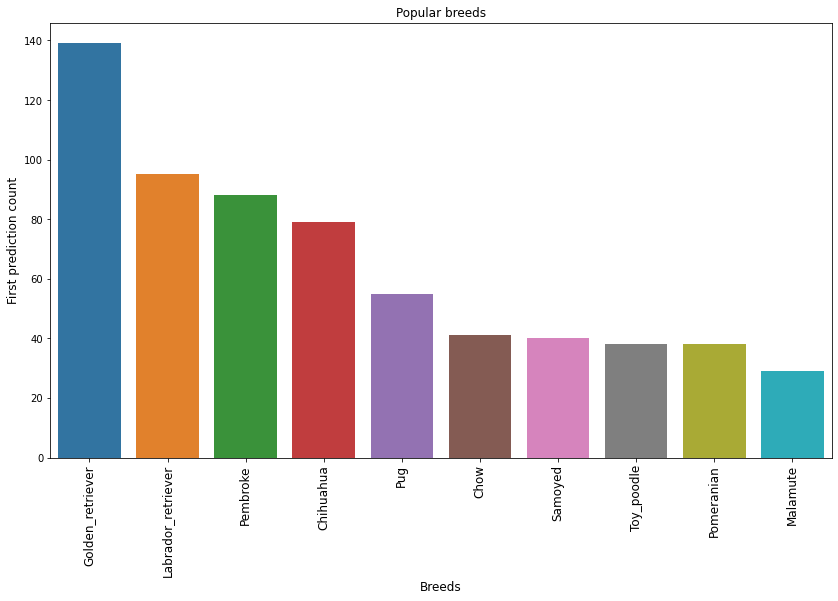

In [115]:
plt.figure(figsize = (14,8))
ax = sns.barplot(x = final['first_prediction'].value_counts()[0:10].index,
            y =final['first_prediction'].value_counts()[0:10],
            data = final);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 12);
plt.xlabel("Breeds",fontsize = 12);
plt.ylabel("First prediction count",fontsize = 12);
plt.title("Popular breeds",fontsize = 12);

Golden_retriever is the most popular breed

In [116]:
final.first_prediction.value_counts().head()

Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    55
Name: first_prediction, dtype: int64

695. tweets talk about Golden retriever breed

In [117]:
mostpopular = final.query('first_prediction == "Golden_retriever"')

In [118]:
#most popular breed -sample dogs image visualization
mostpopular.head()

tweet_id                 timestamp  \
14  889531135344209921 2017-07-24 17:02:04+00:00   
16  888917238123831296 2017-07-23 00:22:39+00:00   
17  888804989199671297 2017-07-22 16:56:37+00:00   
39  883482846933004288 2017-07-08 00:28:19+00:00   
41  883117836046086144 2017-07-07 00:17:54+00:00   

                                                 text  rating_numerator  \
14  This is Stuart. He's sporting his favorite fan...                13   
16  This is Jim. He found a fren. Taught him how t...                12   
17  This is Zeke. He has a new stick. Very proud o...                13   
39  This is Bella. She hopes her smile made you sm...                 5   
41  Please only send dogs. We don't rate mechanics...                13   

    rating_denominator    name   sect  \
14                  10  Stuart  puppo   
16                  10     Jim    NaN   
17                  10    Zeke    NaN   
39                  10   Bella    NaN   
41                  10    None    NaN   

                                            jpg_url  img_num  \
14  https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg      1.0   
16  https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg      1.0   
17  https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg      1.0   
39  https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg      1.0   
41  https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg      2.0   

    first_prediction  first_confidence first_dog   second_prediction  \
14  Golden_retriever          0.953442      True  Labrador_retriever   
16  Golden_retriever          0.714719      True     Tibetan_mastiff   
17  Golden_retriever          0.469760      True  Labrador_retriever   
39  Golden_retriever          0.943082      True  Labrador_retriever   
41  Golden_retriever          0.949562      True  Labrador_retriever   

    second_confidence second_dog    third_prediction  third_confidence  \
14           0.013834       True             Redbone          0.007958   
16           0.120184       True  Labrador_retriever          0.105506   
17           0.184172       True      English_setter          0.073482   
39           0.032409       True              Kuvasz          0.005501   
41           0.045948       True              Kuvasz          0.002471   

   third_dog  retweet_count  favorite_count  
14      True         2321.0         15359.0  
16      True         4709.0         29611.0  
17      True         4559.0         26080.0  
39      True        10407.0         46860.0  
41      True         6949.0         37914.0

In [119]:
mostpopular.sort_values(by = 'favorite_count',ascending = False,inplace = True)

<ipython-input-119-0799d02c092d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mostpopular.sort_values(by = 'favorite_count',ascending = False,inplace = True)


In [120]:
mostpopular=mostpopular.loc[:,['favorite_count','jpg_url','rating_numerator','first_prediction']][0:20]
mostpopular

favorite_count                                            jpg_url  \
94          85011.0    https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg   
459         55683.0  https://pbs.twimg.com/ext_tw_video_thumb/79546...   
190         48410.0    https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg   
39          46860.0    https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg   
45          45880.0    https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg   
853         44619.0    https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg   
41          37914.0    https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg   
227         37277.0    https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg   
455         36177.0    https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg   
331         34984.0    https://pbs.twimg.com/media/C2PjgjQXcAAc4Uu.jpg   
369         32000.0    https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg   
117         31459.0    https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg   
511         29725.0    https://pbs.twimg.com/media/Cuvau3MW8AAxaRv.jpg   
16          29611.0    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
53          29075.0    https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg   
280         26952.0    https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg   
112         26640.0    https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg   
17          26080.0    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
297         23767.0    https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg   
384         23337.0    https://pbs.twimg.com/media/C0iKPZIXUAAbDYV.jpg   

     rating_numerator  first_prediction  
94                 13  Golden_retriever  
459                13  Golden_retriever  
190                13  Golden_retriever  
39                  5  Golden_retriever  
45                 13  Golden_retriever  
853                12  Golden_retriever  
41                 13  Golden_retriever  
227                12  Golden_retriever  
455                11  Golden_retriever  
331                13  Golden_retriever  
369                12  Golden_retriever  
117                13  Golden_retriever  
511                12  Golden_retriever  
16                 12  Golden_retriever  
53                 12  Golden_retriever  
280                12  Golden_retriever  
112                13  Golden_retriever  
17                 13  Golden_retriever  
297                12  Golden_retriever  
384                13  Golden_retriever

In [121]:
mostpopular.index

Int64Index([ 94, 459, 190,  39,  45, 853,  41, 227, 455, 331, 369, 117, 511,
             16,  53, 280, 112,  17, 297, 384],
           dtype='int64')

Checking some random golden retriever breeds images

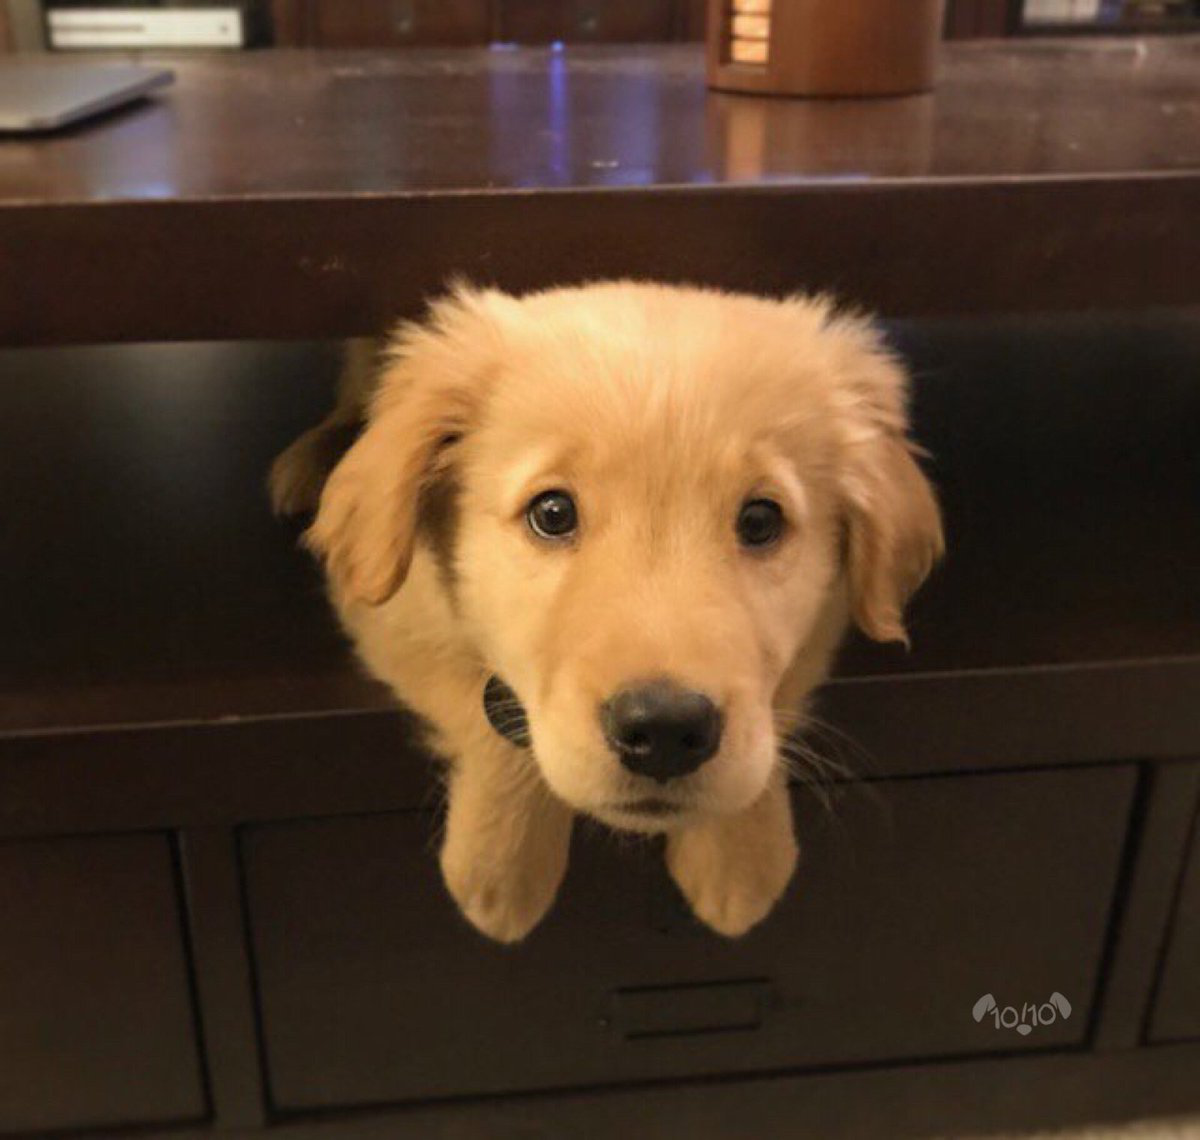

In [122]:
url = mostpopular.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

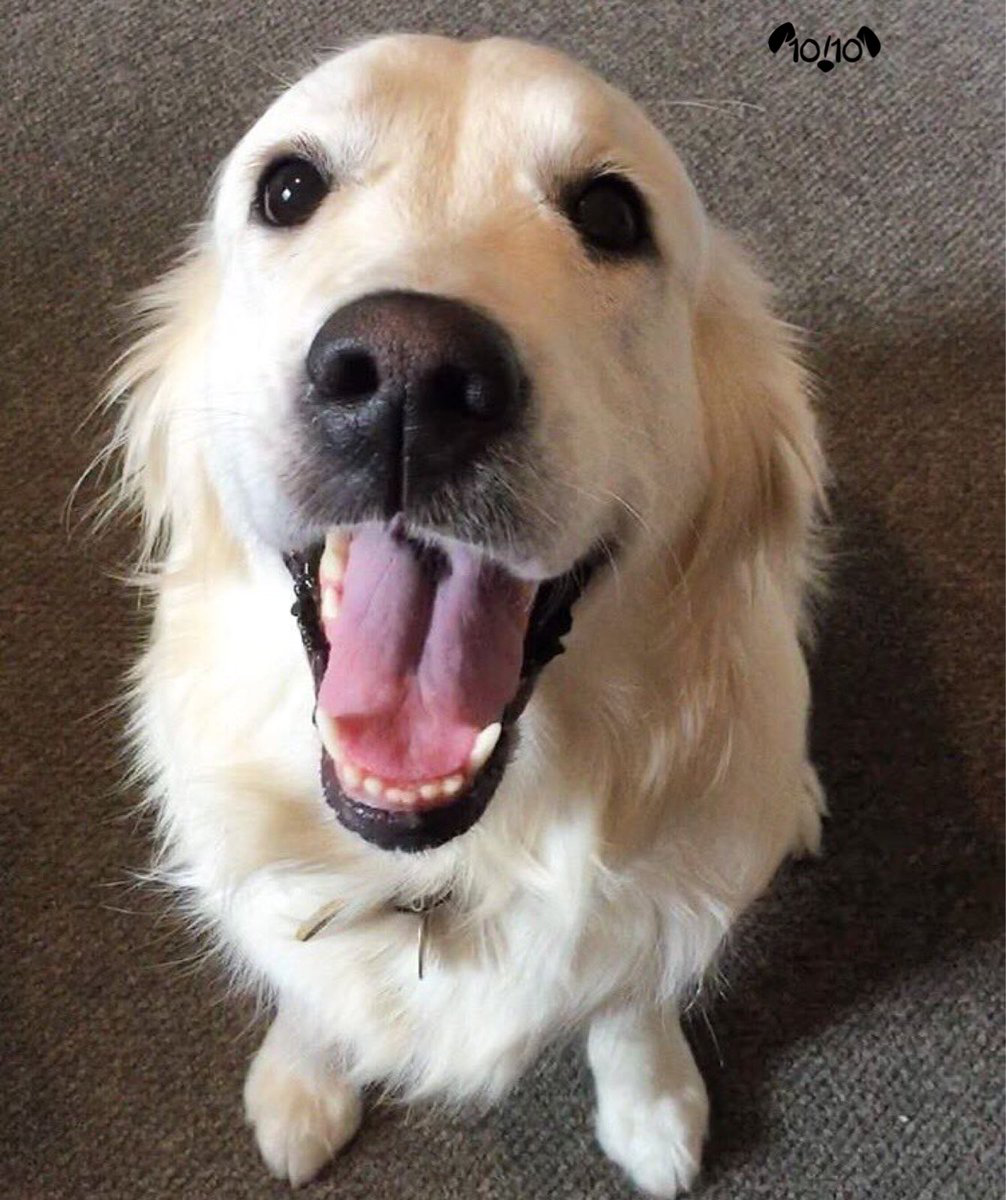

In [130]:
url = mostpopular.jpg_url.iloc[3]
r = requests.get(url)
Image.open(BytesIO(r.content))

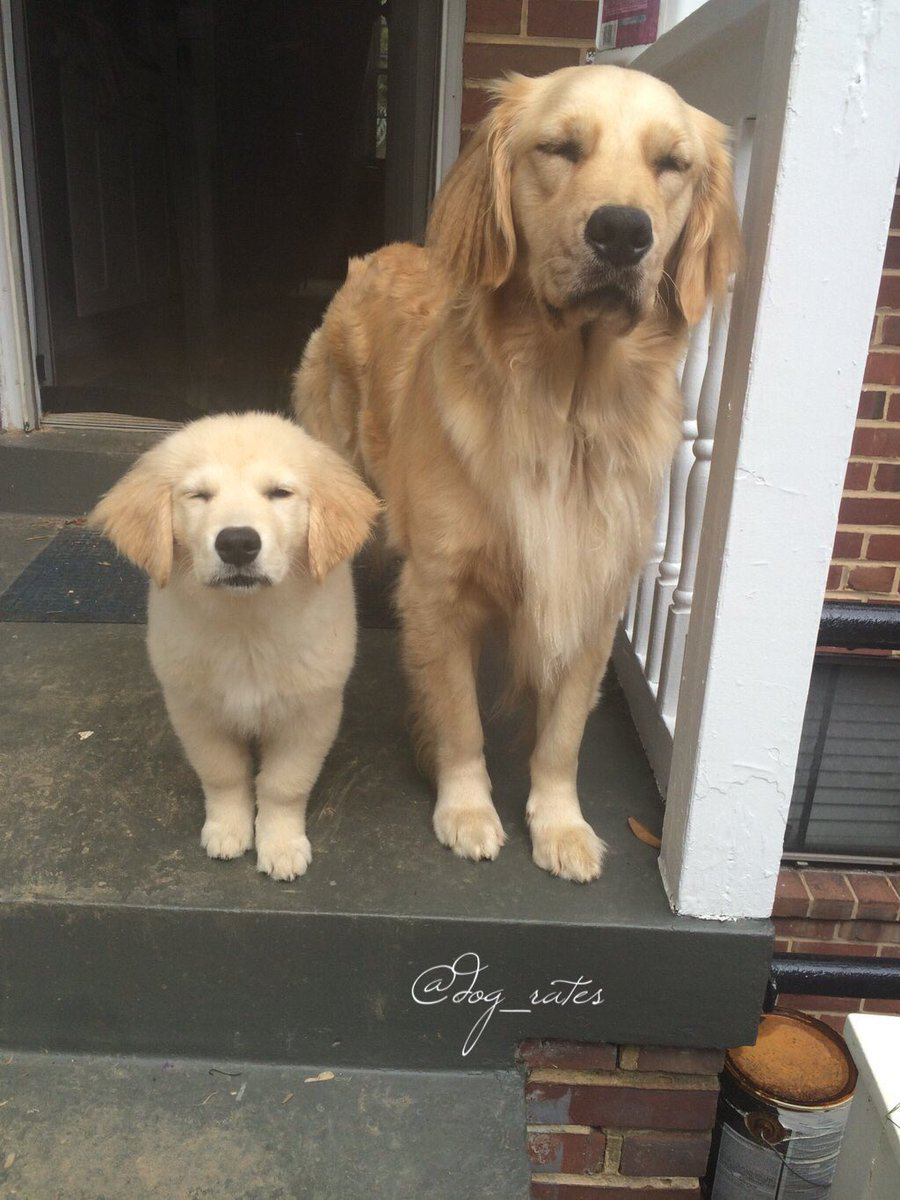

In [123]:
url = mostpopular.jpg_url.iloc[5]
r = requests.get(url)
Image.open(BytesIO(r.content))

#### plotting a corelation matrix for important variables like favourite count, retweet count and ratings- dataframe in question is 'final'

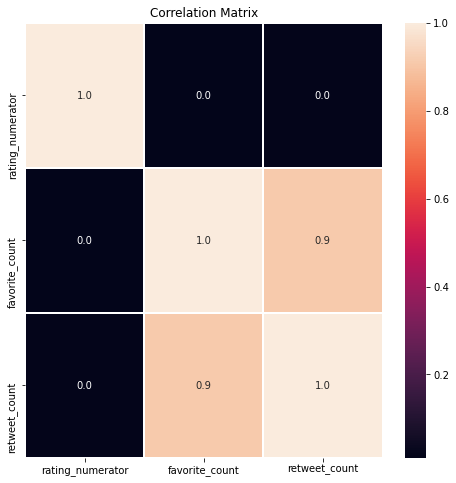

In [124]:
#this will give an insight to the relationship between these variables, using heatmap , plot type
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(final[['rating_numerator', 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=.4, fmt= '.1f')
plt.title('Correlation Matrix');

Strong positive correlation between Favorites and retweets counts is observed. r = 0.9

In [129]:
df_dog_rating = final.groupby('first_prediction').count()
df_dog_rating

tweet_id  timestamp  text  rating_numerator  \
first_prediction                                                   
Acorn_squash                2          2     2                 2   
Afghan_hound                3          3     3                 3   
African_crocodile           1          1     1                 1   
African_grey                1          1     1                 1   
African_hunting_dog         1          1     1                 1   
...                       ...        ...   ...               ...   
Wood_rabbit                 3          3     3                 3   
Wooden_spoon                1          1     1                 1   
Wool                        2          2     2                 2   
Yorkshire_terrier           8          8     8                 8   
Zebra                       1          1     1                 1   

                     rating_denominator  name  sect  jpg_url  img_num  \
first_prediction                                                        
Acorn_squash                          2     2     0        2        2   
Afghan_hound                          3     3     0        3        3   
African_crocodile                     1     1     0        1        1   
African_grey                          1     1     0        1        1   
African_hunting_dog                   1     1     0        1        1   
...                                 ...   ...   ...      ...      ...   
Wood_rabbit                           3     3     1        3        3   
Wooden_spoon                          1     1     1        1        1   
Wool                                  2     2     1        2        2   
Yorkshire_terrier                     8     8     0        8        8   
Zebra                                 1     1     0        1        1   

                     first_confidence  first_dog  second_prediction  \
first_prediction                                                      
Acorn_squash                        2          2                  2   
Afghan_hound                        3          3                  3   
African_crocodile                   1          1                  1   
African_grey                        1          1                  1   
African_hunting_dog                 1          1                  1   
...                               ...        ...                ...   
Wood_rabbit                         3          3                  3   
Wooden_spoon                        1          1                  1   
Wool                                2          2                  2   
Yorkshire_terrier                   8          8                  8   
Zebra                               1          1                  1   

                     second_confidence  second_dog  third_prediction  \
first_prediction                                                       
Acorn_squash                         2           2                 2   
Afghan_hound                         3           3                 3   
African_crocodile                    1           1                 1   
African_grey                         1           1                 1   
African_hunting_dog                  1           1                 1   
...                                ...         ...               ...   
Wood_rabbit                          3           3                 3   
Wooden_spoon                         1           1                 1   
Wool                                 2           2                 2   
Yorkshire_terrier                    8           8                 8   
Zebra                                1           1                 1   

                     third_confidence  third_dog  retweet_count  \
first_prediction                                                  
Acorn_squash                        2          2              2   
Afghan_hound                        3          3              3   
African_crocodile                   1          1         

In [131]:
pwd

'C:\\Users\\Deepak'

# Conclusion (Insight)

These datasets gave a good case for processing data from multiple datasets and working with images in jupyternotebook. 
Also this excercise sets a tone for text processing.
Dtasets gave following insights,

1. Golden retriever is the most popular breed.
2. There is a strong correlation exists between favourite counts and retweet counts.
3. Social platforms data , inparticular text data is always messy like this one,
   where the ratings , numerator or denominator are mentioned beyond a certian value
